### PET ADOPTION Dataset

In [1]:
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import nltk as nlp
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [1]:
#Before working on the dataset in Python, I have removed columns with redudant information and rows with null values.

In [84]:
df_original = pd.read_csv('C:/Users/saksh/Desktop/train.csv')
df_original.head()

,Type,Age,Gender,Color,Size,FurLength,Vaccinated,Dewormed,Sterilized,Health,Description,PetID,AdoptionSpeed
0,2,3,1,1,1,1,2,2,2,1,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2
1,2,1,1,1,2,2,3,3,3,1,I just found it alone yesterday near my apartm...,6296e909a,0
2,1,1,1,2,2,2,1,1,2,1,Their pregnant mother was dumped by her irresp...,3422e4906,3
3,1,4,2,1,2,1,1,1,2,1,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2
4,1,1,1,1,2,1,2,2,2,1,This handsome yet cute boy is up for adoption....,850a43f90,2


In [111]:
df_original.shape

(14993, 13)

In [117]:
df1= df_original.drop_duplicates(subset = 'PetID', inplace = False)
df1.shape

(14993, 13)

In [118]:
df= df_original.drop_duplicates(subset = 'Description', inplace = False)
df.shape

(14002, 13)

In [ ]:
#Here, we can see that there are pets with different PetID but same Description. Hence, I removed those entries.

In [87]:
df.isna().sum() #no null values in the dataset except for the Description column

Type             0
Age              0
Gender           0
Color            0
Size             0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Description      1
PetID            0
AdoptionSpeed    0
dtype: int64

### DATA PROCESSING

In [8]:
#Now we convert the numerical data into text data so that we can create dummy variables

In [88]:
def my_func(row):
    if row['Type']==2:
        val = 'Cat'
    else:
        val = 'Dog'
    return val
df['Type'] = df.apply(my_func, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\1947388988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df.apply(my_func, axis=1)


In [89]:
def my_func2(row):
    if row['Gender']==2:
        val = 'Female'
    else:
        val = 'Male'
    return val
df['Gender'] = df.apply(my_func2, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\136547245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df.apply(my_func2, axis=1)


In [90]:
def numtotext(row):
    if row.FurLength==1:
        val='Short'
    elif row.FurLength==2:
        val='Medium'
    elif row.FurLength==3:
        val='Long'
    else: val='Not Specified'
    return val
df['FurLength']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\2874342221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FurLength']=df.apply(numtotext, axis=1)


In [91]:
def numtotext(df):
    if df.Vaccinated==1:
        val='Yes'
    elif df.Vaccinated==2:
        val='No'
    elif df.Vaccinated==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Vaccinated']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\207963058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vaccinated']=df.apply(numtotext, axis=1)


In [92]:
def numtotext(df):
    if df.Dewormed==1:
        val='Yes'
    elif df.Dewormed==2:
        val='No'
    elif df.Dewormed==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Dewormed']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\35500033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dewormed']=df.apply(numtotext, axis=1)


In [93]:
def numtotext(df):
    if df.Sterilized==1:
        val='Yes'
    elif df.Sterilized==2:
        val='No'
    elif df.Sterilized==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Sterilized']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\2206426617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sterilized']=df.apply(numtotext, axis=1)


In [94]:
def numtotext(df):
    if df.Health==1:
        val='Healthy'
    elif df.Health==2:
        val='Minor Injury'
    elif df.Health==3:
        val='Serious Injury'
    else: val='Not Specified'
    return val
df['Health']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3755023601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Health']=df.apply(numtotext, axis=1)


In [95]:
def numtotext(df):
    if df.Color==1:
        val='Black'
    elif df.Color==2:
        val='Brown'
    elif df.Color==3:
        val='Golden'
    elif df.Color==4:
        val='Yellow'
    elif df.Color==5:
        val='Cream'
    elif df.Color==6:
        val='Gray'    
    else: val='White'
    return val
df['Color']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\1640194577.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color']=df.apply(numtotext, axis=1)


In [96]:
def numtotext(df):
    if df.Size==1:
        val='Small'
    elif df.Size==2:
        val='Medium'
    elif df.Size==3:
        val='Large'
    else: val='Not Specified'
    return val
df['Size']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3165463011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size']=df.apply(numtotext, axis=1)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14002 entries, 0 to 14992
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           14002 non-null  object
 1   Age            14002 non-null  int64 
 2   Gender         14002 non-null  object
 3   Color          14002 non-null  object
 4   Size           14002 non-null  object
 5   FurLength      14002 non-null  object
 6   Vaccinated     14002 non-null  object
 7   Dewormed       14002 non-null  object
 8   Sterilized     14002 non-null  object
 9   Health         14002 non-null  object
 10  Description    14001 non-null  object
 11  PetID          14002 non-null  object
 12  AdoptionSpeed  14002 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.5+ MB


In [461]:
#Categorizing Adoption Speed into specific classes
#As per the existing dataset, following is the classification:

#Adoption Speed = 0, Adopted within a day
#Adoption Speed = 1, Adopted within a week
#Adoption Speed = 2, Adopted within a month
#Adoption Speed = 3, Adopted within 3 months
#Adoption Speed = 4, Not Adopted in 3 months

#For generating accurate predictions, we will categorize the Adoption Speed as follows:

#Adoption Speed = 0,1,2 -> Adoption Speed = Fast
#Adoption Speed = 3,4 -> Adoption Speed = Slow

In [98]:
#creating a column for categorizing Adoption Speed
df['AdoptionSpeed_categorical'] = df['AdoptionSpeed'] 

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3188640627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical'] = df['AdoptionSpeed']


In [99]:
def numtotext(df):
    if df.AdoptionSpeed<=2:
        val='Fast'
    else:
        val='Slow'
    return val
df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\962322626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)


### EXPLORATORY DATA ANALYSIS

In [100]:
#Exploratory Data Analysis
def EDA(dataset):
    amean=dataset.Age.mean()
    gcount=dataset.Gender.value_counts().to_frame()
    msize=dataset.Size.value_counts().to_frame()
    h=dataset.Health.value_counts().to_frame()
    return print("Mean Age in months: "+str(amean)), print(gcount), print(msize), print(h) 

In [101]:
EDA(df)

Mean Age in months: 10.70432795314955
        Gender
Male      7267
Female    6735
               Size
Medium         9539
Small          3231
Large          1201
Not Specified    31
                Health
Healthy          13508
Minor Injury       460
Serious Injury      34


(None, None, None, None)

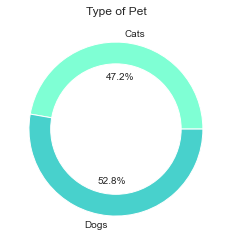

In [102]:
x=df['Type'][df['Type']=='Cat'].count()
y=df['Type'][df['Type']=='Dog'].count()

fig, ax2=plt.subplots()
ax2.pie((x,y), labels=('Cats','Dogs'), autopct='%1.1f%%', colors=('aquamarine','mediumturquoise'))

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Type of Pet')
plt.show()

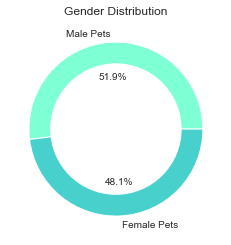

In [103]:
x=df['Gender'][df['Gender']=='Male'].count()
y=df['Gender'][df['Gender']=='Female'].count()

fig, ax1=plt.subplots()
ax1.pie((x,y), labels=('Male Pets','Female Pets'), autopct='%1.1f%%', colors=('aquamarine','mediumturquoise'))

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender Distribution')
plt.show()

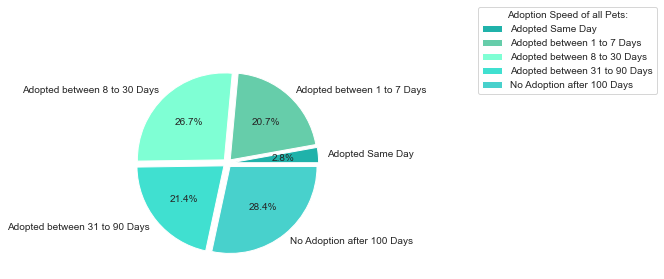

In [104]:
adoption_speed = df.AdoptionSpeed.value_counts(ascending = True).sort_index().to_frame()
adoption_speed_labels = ['Adopted Same Day', 'Adopted between 1 to 7 Days', 'Adopted between 8 to 30 Days', 'Adopted between 31 to 90 Days', 'No Adoption after 100 Days' ] 
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(adoption_speed.AdoptionSpeed, labels = adoption_speed_labels, colors = colors, autopct='%1.1f%%', explode = explode)
colors = ['lightseagreen','mediumaquamarine','aquamarine','turquoise','mediumturquoise']
plt.legend(title = "Adoption Speed of all Pets:", bbox_to_anchor=(2.5,1.02), loc = 'right')
plt.show()

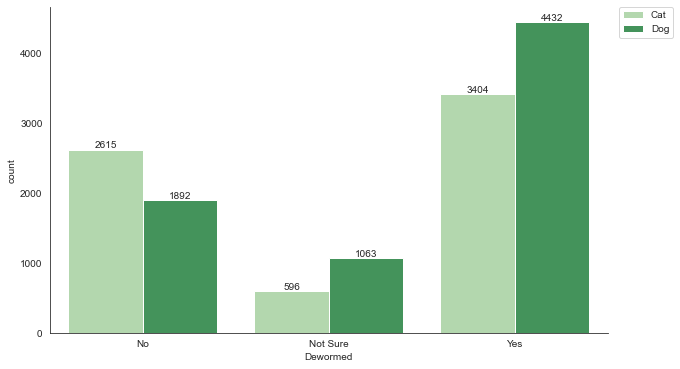

In [105]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x="Dewormed", hue='Type', palette = 'Greens')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
sns.set_style("white")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

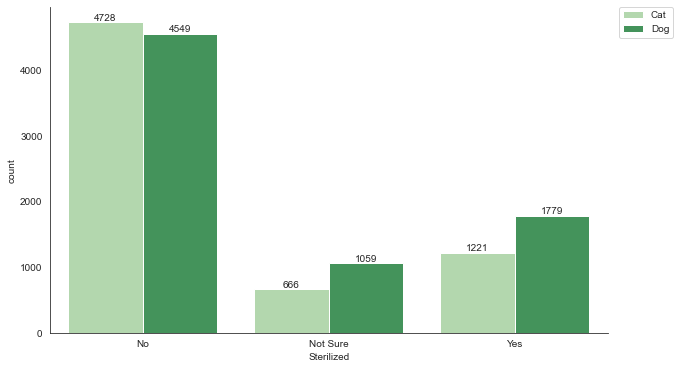

In [106]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x="Sterilized", hue='Type', palette = 'Greens')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
sns.set_style("white")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

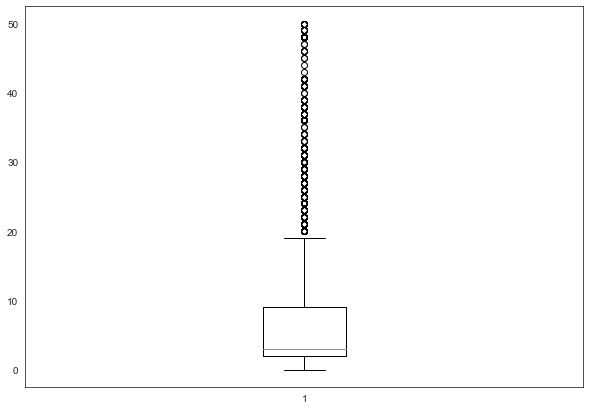

In [107]:
#Box Plot to understand Age Distribution

fig = plt.figure(figsize =(10, 7))
temp=df[df.Age<=50] 
plt.boxplot(temp.Age)
 
plt.show()

#Even after filtering the age as less than 50 months, we notice that there are many outliers above the age of 18 months

In [108]:
#Now I exploredthe distribution of the age by removing the outliers

#Removing outliers:
outliers=df[df.Age>20].index
df.drop(outliers, inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\958913191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers, inplace=True)


Text(0.5, 0, 'Age (months)')

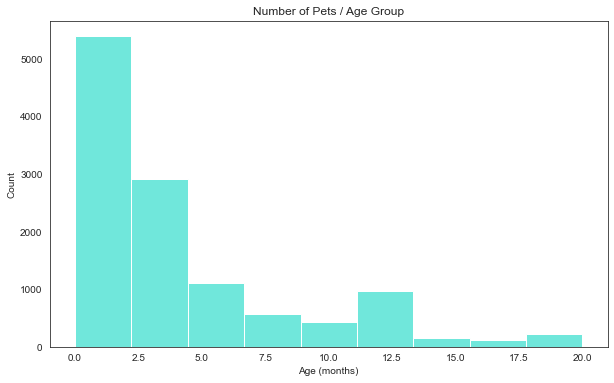

In [109]:
fig=plt.figure(figsize=(10,6))
petage=df.Age
sns.histplot(petage,bins=9,color='turquoise')
plt.title('Number of Pets / Age Group')
plt.xlabel('Age (months)')